In [1]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
directory = '/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed/'
os.chdir(directory)

In [2]:
lindf = pd.DataFrame
contentlist = []
for path in glob.glob("LineageData/lineagedata_*.csv"):
    df = pd.read_csv(path,header=0)
    contentlist.append(df)
    lindf = pd.concat(contentlist)

In [3]:
lindf = lindf.drop(lindf.columns[0], axis=1)

In [4]:
lindf.Lineage_Elongation_Rate.std(ddof=1)/lindf.Lineage_Elongation_Rate.mean()

0.11566176691027057

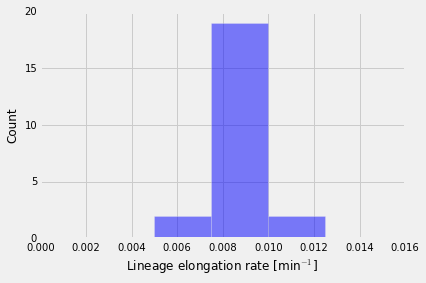

In [32]:
ax= lindf.Lineage_Elongation_Rate.hist(color = 'blue', alpha= 0.5,bins=[0, 0.0025,0.005,0.0075,0.01,0.0125,0.015])
ax.set_xlabel(r'Lineage elongation rate [min$^{-1}$]')
ax.set_ylabel('Count')
#ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/LineageERHistogram.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


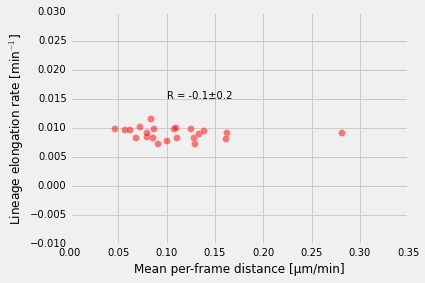

In [31]:
ax = lindf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Lineage_Elongation_Rate',alpha=0.5, color = 'red', s =50)
corr = lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Cartesian_Displacement)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Cartesian_Displacement))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.1,0.015))
ax.set_ylabel(r'Lineage elongation rate [min$^{-1}$]')
ax.set_xlabel("Mean per-frame distance [µm/min]")
#ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER-MeanCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


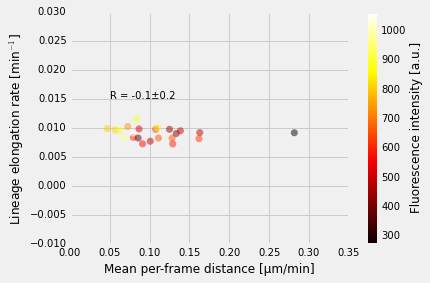

In [30]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1)
ax.scatter(lindf.Mean_Cartesian_Displacement, lindf.Lineage_Elongation_Rate,alpha=0.5,c = lindf.Fluorescence_Intensity, cmap =cm.hot,s=50, edgecolor ='None')
corr = lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Cartesian_Displacement)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Cartesian_Displacement))**2)/len(lindf))**(0.5)
sm = plt.cm.ScalarMappable(cmap=cm.hot)
sm.set_array(lindf.Fluorescence_Intensity)
plt.colorbar(sm, label = 'Fluorescence intensity [a.u.]')
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.05,0.015))
ax.set_ylabel(r'Lineage elongation rate [min$^{-1}$]')
ax.set_xlabel("Mean per-frame distance [µm/min]")
#ax.grid(False)
plt.tight_layout()
#plt.show()

fig1 = plt.gcf()
fig1.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER-MeanCart-Scatter-Fluor.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


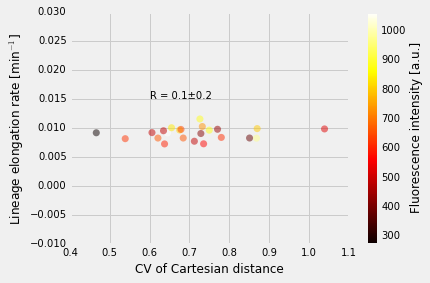

In [29]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1)
ax.scatter(lindf.CV_Cartesian_Displacement, lindf.Lineage_Elongation_Rate,alpha=0.5,c = lindf.Fluorescence_Intensity, cmap =cm.hot,s=50, edgecolor ='None')
corr = lindf.Lineage_Elongation_Rate.corr(lindf.CV_Cartesian_Displacement)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.CV_Cartesian_Displacement))**2)/len(lindf))**(0.5)
sm = plt.cm.ScalarMappable(cmap=cm.hot)
sm.set_array(lindf.Fluorescence_Intensity)
plt.colorbar(sm, label = 'Fluorescence intensity [a.u.]')
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.6,0.015))
ax.set_ylabel(r'Lineage elongation rate [min$^{-1}$]')
ax.set_xlabel("CV of Cartesian distance")
#ax.grid(False)
plt.tight_layout()
#plt.show()

fig1 = plt.gcf()
fig1.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER-CVCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


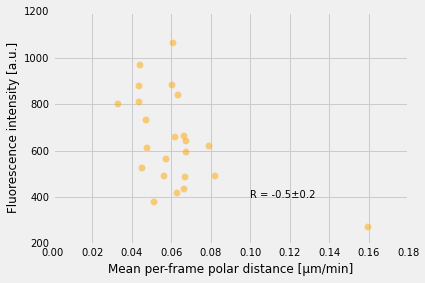

In [28]:
ax = lindf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Fluorescence_Intensity',alpha=0.5, color = 'orange',s =50)
corr = lindf.Fluorescence_Intensity.corr(lindf.Mean_Polar_Displacement)
corrstder = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder, (0.1,400))
ax.set_ylabel('Fluorescence intensity [a.u.]')
ax.set_xlabel("Mean per-frame polar distance [µm/min]")
#ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-Fluor-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


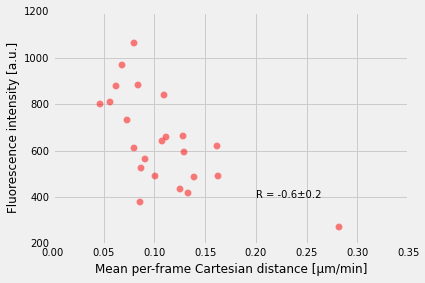

In [27]:
ax = lindf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Fluorescence_Intensity',s=50,alpha=0.5,color = 'red')
corr = lindf.Fluorescence_Intensity.corr(lindf.Mean_Cartesian_Displacement)
corrstder = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Mean_Cartesian_Displacement))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder, (0.2,400))
ax.set_ylabel('Fluorescence intensity [a.u.]')
ax.set_xlabel("Mean per-frame Cartesian distance [µm/min]")
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-Fluor-MeanCart-Scatter.pdf')